# Nucleosynthesis: Modelling of the Sun.

## Step 0: Preparations.

In [1]:
# Import necessary modules and libraries.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

# Several key parameters.
NA = 6.022e23
ne0 = 7.6e25
c = 3e8
amu_kgConvert = 1.66053906892e-27

In [2]:
# Look up table for the elements to make our lives easier
elemChart = {
    'H1': 0,
    'H2': 1,
    'He3': 2,
    'He4': 3,
    'Li7': 4,
    'Be7': 5,
    'Be8': 6,
    'B8': 7,
    'C12': 8,
    'C13': 9,
    'N13': 10,
    'N14': 11,
    'N15': 12,
    'O15': 13,
    'O16': 14,
    'O17': 15,
    'F17': 16
}

elementMasses = {
    'H1': 1.007825,
    'H2': 2.014102,
    'He3': 3.016029,
    'He4': 4.002603,
    'Li7': 7.016003,
    'Be7': 7.016929, # Check again
    'Be8': 8.005305, # Check again
    'B8': 8.024607, # Check again
    'C12': 12.0,
    'C13': 13.003355,
    'N13': 13.005738, # Check again
    'N14': 14.003074,
    'N15': 15.000109,
    'O15': 15.003065, # Check again
    'O16': 15.994915,
    'O17': 16.999132,
    'F17': 17.999161, # Check again
    'electron': 0.00054858
}

energies = []

## Step 1: Main Sequence of the Sun.
- Firstly we extract T(t) and rho(t) of MS of Sun from MESA, see Ref [1].

In [3]:
t_MS = np.array([1.00000000e+05, 2.20000000e+05, 3.64000000e+05, 5.36800000e+05,
        7.44160000e+05, 9.92992000e+05, 1.29159040e+06, 1.64990848e+06,
        2.07989018e+06, 2.59586821e+06, 3.21504185e+06, 3.95805022e+06,
        4.84966027e+06, 5.91959232e+06, 7.20351079e+06, 8.74421294e+06,
        1.05930555e+07, 1.28116666e+07, 1.54740000e+07, 1.86688000e+07,
        2.25025600e+07, 2.71030719e+07, 3.26236863e+07, 3.92484236e+07,
        4.71981083e+07, 5.67377300e+07, 6.81852760e+07, 8.19223312e+07,
        9.84067974e+07, 1.18188157e+08, 1.41925788e+08, 1.70410946e+08,
        2.04593135e+08, 2.45611762e+08, 2.94834115e+08, 3.53900937e+08,
        4.24781125e+08, 5.09837350e+08, 6.11904820e+08, 7.34385784e+08,
        8.81362941e+08, 1.05586857e+09, 1.20944836e+09, 1.35320623e+09,
        1.49200171e+09, 1.62810422e+09, 1.76260699e+09, 1.89604296e+09,
        2.02867088e+09, 2.16061321e+09, 2.29192385e+09, 2.42262157e+09,
        2.55270696e+09, 2.68217068e+09, 2.81099785e+09, 2.93917154e+09,
        3.06667490e+09, 3.19347573e+09, 3.31954902e+09, 3.44488778e+09,
        3.56947809e+09, 3.69330214e+09, 3.81633968e+09, 3.93856887e+09,
        4.05996697e+09, 4.18051194e+09, 4.30018350e+09, 4.41896264e+09,
        4.53683123e+09, 4.65377208e+09, 4.76976939e+09, 4.88480861e+09,
        4.99887608e+09, 5.11195841e+09, 5.22404244e+09, 5.33511660e+09,
        5.44517090e+09, 5.55419526e+09, 5.66217778e+09, 5.76909210e+09,
        5.87491235e+09, 5.97961926e+09, 6.08318058e+09, 6.18555459e+09,
        6.28669935e+09, 6.38657965e+09, 6.48516395e+09, 6.58241822e+09,
        6.67840255e+09, 6.77311743e+09, 6.86646355e+09, 6.95840799e+09,
        7.04899602e+09, 7.13839316e+09, 7.22688242e+09, 7.31364901e+09,
        7.39607916e+09, 7.47211952e+09, 7.54147977e+09, 7.60473329e+09,
        7.66274941e+09, 7.71641049e+09, 7.76650126e+09, 7.81368830e+09,
        7.85849881e+09, 7.90133458e+09, 7.94251305e+09, 7.98229020e+09,
        8.02086756e+09, 8.05839653e+09, 8.09499967e+09, 8.13077907e+09,
        8.16581570e+09, 8.20017215e+09, 8.23390066e+09, 8.26704415e+09,
        8.29963760e+09, 8.33171022e+09, 8.36328652e+09, 8.39438761e+09,
        8.42503114e+09, 8.45523325e+09, 8.48500701e+09, 8.51436150e+09,
        8.54330535e+09, 8.57184679e+09, 8.59999316e+09, 8.62775050e+09,
        8.65512452e+09, 8.68212030e+09, 8.70874261e+09, 8.73499605e+09,
        8.76088505e+09, 8.78641435e+09, 8.81158820e+09, 8.83641054e+09,
        8.86088566e+09, 8.88501816e+09, 8.90881201e+09, 8.93227068e+09,
        8.95539787e+09, 8.97819762e+09, 9.00067403e+09, 9.02283123e+09,
        9.04467384e+09, 9.06620646e+09, 9.08743297e+09, 9.10835715e+09,
        9.12898299e+09, 9.14931448e+09, 9.16935588e+09, 9.18911142e+09,
        9.20858521e+09, 9.22778137e+09, 9.24670406e+09, 9.26535743e+09,
        9.28374586e+09, 9.30187363e+09, 9.31974472e+09, 9.33736336e+09,
        9.35473357e+09, 9.37185915e+09, 9.38874397e+09, 9.40539214e+09,
        9.42180763e+09, 9.43799411e+09, 9.45395531e+09, 9.46969499e+09,
        9.48521705e+09, 9.50052518e+09, 9.51562287e+09, 9.53051368e+09,
        9.54520110e+09, 9.55968889e+09, 9.57398046e+09, 9.58807883e+09,
        9.60198751e+09, 9.61570973e+09, 9.62924867e+09, 9.64260758e+09,
        9.65578887e+09, 9.66879516e+09, 9.68162978e+09, 9.69429583e+09,
        9.70679610e+09, 9.71913353e+09, 9.73131044e+09, 9.74332915e+09])*3.154e7  # t in years

T_MS = np.array([13608207.12501844, 13606936.5547077 , 13605378.67128833,
        13603764.71542995, 13601862.83175318, 13599899.16529784,
        13598018.58407819, 13596173.27614667, 13594525.29265543,
        13593141.80377485, 13591750.80293421, 13590668.37489243,
        13589525.75716437, 13588486.1044802 , 13587182.42743506,
        13585857.61502365, 13584162.18273373, 13582008.20261147,
        13579724.18124953, 13577363.64237727, 13574499.71109951,
        13572238.65887965, 13570238.19633164, 13569956.54048117,
        13571386.10928046, 13573861.09683007, 13577306.6270843 ,
        13581706.62495565, 13587118.59912082, 13593676.10884736,
        13601593.04734255, 13611159.32883499, 13622738.27967445,
        13636765.11994813, 13653761.9399538 , 13674358.23235752,
        13699321.41520631, 13729606.69602894, 13766395.32903721,
        13811186.23618382, 13865900.33184596, 13932281.47723731,
        13991959.11039447, 14048948.78681369, 14105039.87109466,
        14161089.28437775, 14217518.01894217, 14274564.07536266,
        14332343.3368623 , 14390941.25899909, 14450408.23340235,
        14510777.12539991, 14572087.39040529, 14634354.82008558,
        14697552.19388598, 14761663.05084268, 14827688.31125002,
        14893702.61772707, 14960685.13777693, 15028665.72651673,
        15097667.04597794, 15167718.95652002, 15238845.61633588,
        15311074.11626528, 15384406.30902558, 15458840.70123369,
        15534386.75427609, 15611051.22907404, 15688826.48634317,
        15767683.85850391, 15847650.56482206, 15928728.93488933,
        16010976.04485707, 16094410.29429482, 16179034.77445618,
        16264863.71037867, 16351905.58632403, 16440206.6314881 ,
        16530436.72973747, 16621397.84505468, 16713760.88400135,
        16807633.92861545, 16903099.99034822, 17000081.33756937,
        17098408.04201933, 17198041.52762719, 17299006.19678891,
        17396250.00650427, 17500487.58771466, 17605789.08547254,
        17713528.78596132, 17822054.15197162, 17931386.95105586,
        18041578.86518344, 18150041.44905734, 18254656.78261419,
        18350239.30624393, 18431718.8111539 , 18498865.88676058,
        18553704.38808991, 18597830.28384512, 18632975.46320472,
        18660130.39458397, 18682823.07313621, 18700849.20559337,
        18715523.11756264, 18726572.19351255, 18735957.02176085,
        18743534.70653801, 18749559.84387689, 18754046.56406421,
        18757984.33795149, 18761145.61665112, 18763706.23452774,
        18765831.41758775, 18767633.23905849, 18769151.36322759,
        18770497.81780976, 18771616.38694128, 18772754.66145749,
        18773573.45590236, 18774701.8662922 , 18775840.85111959,
        18777022.84212558, 18778213.23562666, 18779499.15483022,
        18780938.36920056, 18782427.2088499 , 18784106.29014719,
        18785818.61346469, 18787725.96318934, 18789661.06651017,
        18791718.22805547, 18793920.78094684, 18796237.75778161,
        18798609.68494023, 18801069.20607522, 18803712.4900188 ,
        18806474.58193498, 18809323.71324135, 18812255.10559582,
        18815285.09974039, 18818392.65320069, 18821502.71443418,
        18824746.04435792, 18828122.98043403, 18831550.17381661,
        18835070.13444237, 18838655.47954621, 18842304.23889787,
        18846010.61187388, 18849779.32289087, 18853601.51019141,
        18857477.28392374, 18861408.31778868, 18865313.64407917,
        18869330.75789046, 18873361.0605301 , 18877421.44701388,
        18881555.72381249, 18885726.23453504, 18889925.42694679,
        18894111.11806843, 18898380.43753555, 18902669.20363821,
        18906966.66326191, 18911292.96777096, 18915592.78529417,
        18919971.8048687 , 18924351.44350108, 18928752.16470201,
        18933168.85614795, 18937509.97125896, 18941996.39214111,
        18946443.00514269, 18950847.51850073, 18955338.33036237,
        18959743.96458095, 18964213.59660046, 18968683.21662227,
        18973188.529897  , 18977678.46829737, 18982175.79769327,
        18986667.62009415, 18991111.9153069 , 18995570.13125253,
        19000073.22322554, 19004567.74392799])                        # T in K.

rho_MS = np.array([ 80.39986258,  80.42926585,  80.46287627,  80.50300259,
         80.54686421,  80.59409726,  80.64421362,  80.69821989,
         80.75262271,  80.80963093,  80.87072593,  80.9351856 ,
         81.01075195,  81.09420256,  81.19484424,  81.307354  ,
         81.44030771,  81.58879273,  81.75487905,  81.93450437,
         82.12398726,  82.32443235,  82.51672342,  82.70143853,
         82.87854109,  83.05379051,  83.23104706,  83.41538468,
         83.61302534,  83.83112289,  84.07773646,  84.36197155,
         84.69427585,  85.08689312,  85.55446471,  86.11481785,
         86.79000368,  87.60768827,  88.60300062,  89.82118092,
         91.32133918,  93.16186311,  94.83791447,  96.45761191,
         98.06907825,  99.69656689, 101.35339644, 103.04721659,
        104.78280211, 106.56354004, 108.39210379, 110.27082624,
        112.20191825, 114.18728091, 116.22679687, 118.32215661,
        120.49154412, 122.7063132 , 124.98368763, 127.32648723,
        129.73756345, 132.21977444, 134.77602213, 137.40853644,
        140.11612892, 142.90138787, 145.76769034, 148.71879079,
        151.75864232, 154.89187577, 158.12278792, 161.45630061,
        164.89699919, 168.44744399, 172.10619118, 175.87819075,
        179.76950717, 183.7860785 , 187.95110219, 192.23888014,
        196.67145519, 201.25477207, 205.97226834, 210.78564904,
        215.68406234, 220.68833978, 225.83391071, 231.00902573,
        236.5458476 , 242.31204132, 248.35488265, 254.60625536,
        261.07932961, 267.79279083, 274.78543567, 282.0017846 ,
        289.26505325, 296.28719039, 303.02377975, 309.44133043,
        315.57745922, 321.49303999, 327.0775443 , 332.58013759,
        337.9311548 , 343.19013337, 348.30613255, 353.38760891,
        358.41343975, 363.38563913, 368.32867774, 373.23941137,
        378.1281099 , 382.99569152, 387.85925697, 392.71707354,
        397.57241114, 402.42986623, 407.29210548, 412.16044647,
        417.03723438, 421.92421572, 426.82463236, 431.73816928,
        436.66680827, 441.62259015, 446.58722223, 451.5692649 ,
        456.57355868, 461.59821511, 466.63979116, 471.7086581 ,
        476.79290947, 481.90026265, 487.02902076, 492.17809921,
        497.34814808, 502.54049399, 507.75877757, 512.99538138,
        518.25425272, 523.53396012, 528.83526757, 534.1548974 ,
        539.48973082, 544.85167212, 550.23726668, 555.63992316,
        561.06491921, 566.49474424, 571.95818451, 577.43849679,
        582.94111606, 588.45910036, 593.99588028, 599.55246928,
        605.12632098, 610.72148053, 616.32390984, 621.95046722,
        627.59729583, 633.25820733, 638.92812832, 644.61976215,
        650.32938941, 656.06273439, 661.80484975, 667.56100461,
        673.33844385, 679.12541823, 684.92904761, 690.74718866,
        696.57002421, 702.42316971, 708.28519735, 714.15460221,
        720.05191241, 725.95887021, 731.87586559, 737.93072076,
        743.87655207, 749.83567042, 755.80864741, 761.83768677,
        767.83086288, 774.0285777 , 780.05379517, 786.09158913])    # rho in g/cm3

rho_MS_0 = rho_MS[0]


T_of_t = interp1d(t_MS, T_MS, kind='linear', fill_value='extrapolate')
rho_of_t = interp1d(t_MS, rho_MS, kind='linear', fill_value='extrapolate')

- Secondly we express rate of reactions within CNO, pp chains and triple alpha w.r.t T, using the data from Ref [2].

In [4]:
######################
# A) CNO cycles.
######################

#CNO1 cycles

def CNO1_cycle(elements, elemChart, elementMasses, t9, rho_factor):
    """
    Construct the differential equations for systems of the CNO1 cycle.

    Parameters
    ----------
    elements : np.array
        Numpy array containing the number densities of the elements.
    elemChart : dict
        Dictionary containing the positions of the elements in the elements array.
    temp : float
        Temperature of the system in K.

    Returns
    -------
    dX : dict
        The differential equations for the system.
    """

    sigma_v_expectation = {
        "C12(p,g)N13": (
            (2.04e7 / (t9**(2/3)) * np.exp(-13.690 / (t9**(1/3)) - (t9 / 1.500)**2)
             * (1 + 0.030 * t9**(1/3) + 1.19 * t9**(2/3) + 0.254 * t9 + 2.06 * t9**(4/3) + 1.12 * t9**(5/3))
             + 1.08e5 * t9**(-3/2) * np.exp(-4.925 / t9)
             + 2.15e05 * t9**(-3/2) * np.exp(-18.179 / t9)
            )
        ),
        "C13(p,g)N14": (
            (8.01e7 / (t9**(2/3)) * np.exp(-13.717 / (t9**(1/3)) - (t9 / 2)**2)
             * (1 + 0.030 * t9**(1/3) + 0.958 * t9**(2/3) + 0.204 * t9 + 1.39 * t9**(4/3) + 0.753 * t9**(5/3))
             + 1.21e6 * t9**(-6/5) * np.exp(-5.701 / t9)
            )
        ),
        "N14(p,g)O15": (
            (4.90e7 / (t9**(2/3)) * np.exp(-15.228 / (t9**(1/3)) - (t9 / 3.294)**2)
             * (1 + 0.027 * t9**(1/3) - 0.778 * t9**(2/3) - 0.149 * t9 + 0.261 * t9**(4/3) + 0.127 * t9**(5/3))
             + 2.37e3 * t9**(-3/2) * np.exp(-3.011 / t9)
             + 2.19e4 * np.exp(-12.530 / t9)
            )
        ),
        "N15(p,a)C12": (
            (1.08e12 / (t9**(2/3)) * np.exp(-15.251 / (t9**(1/3)) - (t9 / 0.522)**2)
             * (1 + 0.027 * t9**(1/3) + 2.62 * t9**(2/3) + 0.501 * t9 + 5.36 * t9**(4/3) + 2.60 * t9**(5/3))
             + 1.19e8 * t9**(-3/2) * np.exp(-3.676 / t9)
             + 5.41e08 * t9**(-1/2) * np.exp(-8.926 / t9)
             + 0.5 * 4.72e08 * t9**(-3/2) * np.exp(-7.721 / t9)
             + 2.20e09 * t9**(-3/2) * np.exp(-11.418 / t9)
            )
        )
    }

    lambda_N13 = np.log(2) / (60*9.965) # half-life of N13 is 9.965 minutes
    lambda_O15 = np.log(2) / (122.24) # half-life of O15 is 122.24 seconds

    C12toN13 = sigma_v_expectation["C12(p,g)N13"] * elements[elemChart["C12"]] * elements[elemChart["H1"]] \
    * rho_factor**2 / NA
    N13toC13 = lambda_N13 * elements[elemChart["N13"]] * rho_factor
    C13toN14 = sigma_v_expectation["C13(p,g)N14"] * elements[elemChart["C13"]] * elements[elemChart["H1"]] \
    * rho_factor**2 / NA
    N14toO15 = sigma_v_expectation["N14(p,g)O15"] * elements[elemChart["N14"]] * elements[elemChart["H1"]] \
    * rho_factor**2 / NA
    O15toN15 = lambda_O15 * elements[elemChart["O15"]] * rho_factor
    N15toC12 = sigma_v_expectation["N15(p,a)C12"] * elements[elemChart["N15"]] * elements[elemChart["H1"]] \
    * rho_factor**2 / NA

    dX = {
        'H1': -C12toN13 - N15toC12 - C13toN14 - N14toO15,
        'He4': N15toC12,
        'C12': N15toC12 - C12toN13,
        'N13': C12toN13 - N13toC13,
        'C13': N13toC13 - C13toN14,
        'N14': C13toN14 - N14toO15,
        'O15': N14toO15 - O15toN15,
        'N15': O15toN15 - N15toC12
    }

    # Calculate energy released in the cycle by finding mass differences

    massDiffC12toN13 = C12toN13 * (elementMasses["C12"] + elementMasses["H1"] - elementMasses["N13"])
    massDiffN13toC13 = N13toC13 * (elementMasses["N13"] - elementMasses["C13"] - elementMasses["electron"])
    massDiffC13toN14 = C13toN14 * (elementMasses["C13"] + elementMasses["H1"] - elementMasses["N14"])
    massDiffN14toO15 = N14toO15 * (elementMasses["N14"] + elementMasses["H1"] - elementMasses["O15"])
    massDiffO15toN15 = O15toN15 * (elementMasses["O15"] - elementMasses["N15"] - elementMasses["electron"])
    massDiffN15toC12 = N15toC12 * (elementMasses["N15"] + elementMasses["H1"] - elementMasses["C12"] - elementMasses["He4"])

    totalMassDiff = (massDiffC12toN13 + massDiffN13toC13 + massDiffC13toN14 + massDiffN14toO15 + massDiffO15toN15 + massDiffN15toC12) * amu_kgConvert

    energyReleased = totalMassDiff * c**2

    return dX, energyReleased


#CNO2 cycles

def CNO2_cycle(elements, elemChart, elementMasses, t9, rho_factor):
    """
    Construct the differential equations for systems of the CNO1 cycle.

    Parameters
    ----------
    elements : np.array
        Numpy array containing the number densities of the elements.
    elemChart : dict
        Dictionary containing the positions of the elements in the elements array.
    temp : float
        Temperature of the system in K.

    Returns
    -------
    dX : dict
        The differential equations for the system.
    """
    sigma_v_expectation = {
        "N14(p,g)O15": (
            (4.90e7 / (t9**(2/3))
            * np.exp(-15.228 / (t9**(1/3)) - (t9 / 3.294)**2)
            * (1 + 0.027 * t9**(1/3)
                - 0.778 * t9**(2/3)
                - 0.149 * t9
                + 0.261 * t9**(4/3)
                + 0.127 * t9**(5/3))
            + 2.37e3 * t9**(-3/2) * np.exp(-3.011 / t9)
            + 2.19e4 * np.exp(-12.530 / t9)
            )
        ),
        "N15(p,g)O16": (
            (9.78e8 / (t9**(2/3))
            * np.exp(-15.251 / (t9**(1/3)) - (t9 / 0.450)**2)
            * (1 + 0.027 * t9**(1/3)
                + 0.219 * t9**(2/3)
                + 0.042 * t9
                + 6.83 * t9**(4/3)
                + 3.32 * t9**(5/3))
            + 1.11e04 * t9**(-3/2) * np.exp(-3.328 / t9)
            + 1.49e04 * t9**(-3/2) * np.exp(-4.665 / t9)
            + 3.80e8 * t9**(-3/2) *np.exp(-11.048/t9)
            )
        ),
        "O16(p,g)F17": (
            (1.50e8
            / (t9**(2/3) * (1 + 2.13 * (1 - np.exp(-0.728 * t9**(2/3))))))
            * np.exp(-16.692 / (t9**(1/3)))
        ),
        "O17(p,a)N14": (
            1.53e7 / (t9**(2/3))
            * np.exp(-16.712 / (t9**(1/3)) - (t9 / 0.565)**2)
            *(1+0.0025*t9**(1/3) + 5.39*t9**(2/3) + 0.940*t9 + 13.5*t9**(4/3) +5.98*t9**(5/3))
            + 2.92e6 *t9 *np.exp(-4.247/t9)
            + 0.5 * 4.81e10 *t9 * np.exp(-16.712*t9**(-1/3) - (t9/0.040)**2)
            + 5.05e-5*t9**(-3/2) * np.exp(-0.723/t9)
            + 0.5 * 1.31e01*t9**(-3/2) *np.exp(-1.961/t9)
        )
    }

    lambda_O15 = np.log(2) / (122.24) # half-life of O15 is 122.24 seconds
    lambda_F17 = np.log(2) / (64.49) # half-life of F17 is 64.49 seconds

    N14toO15 = sigma_v_expectation["N14(p,g)O15"] * elements[elemChart["N14"]] * elements[elemChart["H1"]] \
    * rho_factor**2 / NA
    O15toN15 = lambda_O15 * elements[elemChart["O15"]] * rho_factor
    N15toO16 = sigma_v_expectation["N15(p,g)O16"] * elements[elemChart["N15"]] * elements[elemChart["H1"]] \
    * rho_factor**2 / NA
    O16toF17 = sigma_v_expectation["O16(p,g)F17"] * elements[elemChart["O16"]] * elements[elemChart["H1"]] \
    * rho_factor**2 / NA
    F17toO17 = lambda_F17 * elements[elemChart["F17"]] * rho_factor
    O17toN14 = sigma_v_expectation["O17(p,a)N14"] * elements[elemChart["O17"]] * elements[elemChart["H1"]] \
    * rho_factor**2 / NA

    dX = {
        "H1": -N14toO15 - N15toO16 - O16toF17 - O17toN14,
        "He4": O17toN14,
        "N14": O17toN14 - N14toO15,
        "O15": N14toO15 - O15toN15,
        "N15": O15toN15 - N15toO16,
        "O16": N15toO16 - O16toF17,
        "F17": O16toF17 - F17toO17,
        "O17": F17toO17 - O17toN14
    }

    # Calculate energy released in the cycle by finding mass differences

    massDiffN14toO15 = N14toO15 * (elementMasses["N14"] + elementMasses["H1"] - elementMasses["O15"])
    massDiffO15toN15 = O15toN15 * (elementMasses["O15"] - elementMasses["N15"] - elementMasses["electron"])
    massDiffN15toO16 = N15toO16 * (elementMasses["N15"] + elementMasses["H1"] - elementMasses["O16"])
    massDiffO16toF17 = O16toF17 * (elementMasses["O16"] + elementMasses["H1"] - elementMasses["F17"])
    massDiffF17toO17 = F17toO17 * (elementMasses["F17"] - elementMasses["O17"] - elementMasses["electron"])
    massDiffO17toN14 = O17toN14 * (elementMasses["O17"] + elementMasses["H1"] - elementMasses["N14"] - elementMasses["He4"])

    totalMassDiff = (massDiffN14toO15 + massDiffO15toN15 + massDiffN15toO16 + massDiffO16toF17 + massDiffF17toO17 + massDiffO17toN14) * amu_kgConvert

    energyReleased = totalMassDiff * c**2

    return dX, energyReleased


##############################
# B) Proton-Proton (PP) Chains.
##############################

lambda_b8_decay = np.log(2) / 0.77

def PP_chain_cycle(elements, elemChart, elementMasses, t9, rho_factor):
    """
    Construct the differential equations for the pp-chain reaction network.

    Parameters
    ----------
    elements : np.array
        Array containing the number densities of the elements.
    elemChart : dict
        Dictionary mapping element names to positions in the elements array.
        Expected keys: 'H1', 'H2', 'He3', 'He4', 'Be7', 'Li7', 'B8'
    temp : float, optional
        Temperature of the system in K (default is 15e6 K).

    Returns
    -------
    dX : dict
        Dictionary containing the time derivatives of the element abundances,
        keyed by the element names.
    """

    # Extract current abundances (ensuring they are non-negative)
    H1  = max(elements[elemChart["H1"]], 0.0)
    H2  = max(elements[elemChart["H2"]], 0.0)
    He3 = max(elements[elemChart["He3"]], 0.0)
    He4 = max(elements[elemChart["He4"]], 0.0)
    Be7 = max(elements[elemChart["Be7"]], 0.0)
    Li7 = max(elements[elemChart["Li7"]], 0.0)
    B8  = max(elements[elemChart["B8"]], 0.0)

    # Assume a constant electron density
    ne = 7.6e25

    # Compute sigma*v expectation values (not final reaction rates yet)
    sigma_v_expectation = {
    "pp": (
        4.01e-15 * t9**(-2/3)
        * np.exp(-3.380 * t9**(-1/3))
        * (1 + 0.123 * t9**(1/3) + 1.09 * t9**(2/3) + 0.938 * t9)
    ),
    "dp": (
        2.24e3 * t9**(-2/3)
        * np.exp(-3.720 * t9**(-1/3))
        * (1 + 0.112 * t9**(1/3) + 3.38 * t9**(2/3) + 2.65 * t9)
    ),
    "33": (
        6.04e10 * t9**(-2/3)
        * np.exp(-12.276 * t9**(-1/3))
        * (1 + 0.034 * t9**(1/3) - 0.522 * t9**(2/3) - 0.124 * t9 
           + 0.353 * t9**(4/3) + 0.213 * t9**(5/3))
    ),
    "34": (
        5.61e6 * (t9 / (1 + 4.95e-2 * t9))**(5/6)
        / (t9**(3/2))
        * np.exp(-12.826 / ((t9 / (1 + 4.95e-2 * t9))**(1/3)))
    ),
    "EC": (
        1.34e-10 * t9**(-1/2)
        * (1 - 0.537 * t9**(1/3) + 3.86 * t9**(2/3)
           + 0.0027 / t9 * np.exp(2.515e-3 / t9))
    ),
    "li7p": (
        1.096e9 * t9**(-2/3) * np.exp(-8.472 * t9**(-1/3))
        - 4.83e8 * (t9 / (1 + 0.759 * t9))**(5/6) * t9**(-3/2)
        * np.exp(-8.472 / (t9 / (1 + 0.759 * t9))**(1/3))
        + 1.06e10 * t9**(-3.2) * np.exp(-30.442 / t9)
    ),
    "be7p": (
        3.11e5 * t9**(-2/3) * np.exp(-10.262 * t9**(-1/3))
        + 2.53e3 * t9**(-3/2) * np.exp(-7.306 / t9)
    )
}


    # Compute reaction rates using the expectation values
    r_pp   = H1 * H1 * sigma_v_expectation["pp"] * rho_factor**2 /NA
    r_dp   = H2 * H1 * sigma_v_expectation["dp"] * rho_factor**2 /NA
    r_33   = He3 * He3 * sigma_v_expectation["33"] * rho_factor**2 /NA
    r_34   = He3 * He4 * sigma_v_expectation["34"] * rho_factor**2 /NA
    r_EC   = Be7 * ne * sigma_v_expectation["EC"] * rho_factor**2 /NA
    r_li7p = Li7 * H1 * sigma_v_expectation["li7p"] * rho_factor**2 /NA
    r_be7p = Be7 * H1 * sigma_v_expectation["be7p"] * rho_factor**2 /NA
    r_b8   = B8 * lambda_b8_decay * rho_factor

    # Construct differential equations for each species
    dH1_dt  = -2 * r_pp - r_dp - r_be7p - r_li7p + 2 * r_33
    dH2_dt  =  r_pp - r_dp
    dHe3_dt =  r_dp - 2 * r_33 - r_34
    dHe4_dt =  r_33 + 2 * r_li7p + 2 * r_b8 - r_34
    dBe7_dt =  r_34 - r_EC - r_be7p
    dLi7_dt =  r_EC - r_li7p
    dB8_dt  =  r_be7p - r_b8

    dX = {
        "H1":  dH1_dt,
        "H2":  dH2_dt,
        "He3": dHe3_dt,
        "He4": dHe4_dt,
        "Be7": dBe7_dt,
        "Li7": dLi7_dt,
        "B8":  dB8_dt
    }

    # Calculate energy released in the cycle by finding mass differences

    massDiffPP = r_pp * (2*elementMasses["H1"] - elementMasses["H2"] - elementMasses["electron"])
    massDiffDP = r_dp * (elementMasses["H2"] + elementMasses["H1"] - elementMasses["He3"])
    massDiff33 = r_33 * (2*elementMasses["He3"] - elementMasses["He4"] - 2*elementMasses["H1"])
    massDiff34 = r_34 * (elementMasses["He3"] + elementMasses["He4"] - elementMasses["Be7"])
    massDiffEC = r_EC * (elementMasses["Be7"] + elementMasses["electron"] - elementMasses["Li7"])
    massDiffLi7p = r_li7p * (elementMasses["Li7"] + elementMasses["H1"] - 2*elementMasses["He4"])
    massDiffBe7p = r_be7p * (elementMasses["Be7"] + elementMasses["H1"] - elementMasses["B8"])
    massDiffB8 = r_b8 * (elementMasses["B8"] - elementMasses["Be8"] - elementMasses["electron"])

    totalMassDiff = (massDiffPP + massDiffDP + massDiff33 + massDiff34 + massDiffEC + massDiffLi7p + massDiffBe7p + massDiffB8) * amu_kgConvert

    energyReleased = totalMassDiff * c**2

    return dX, energyReleased


##########################
# C) Triple-Alpha Process.
##########################

def triple_alpha(elements, elemChart, elementMasses, t9, rho_factor):
    """
    Construct the differential equations for the triple-alpha process.

    Parameters
    ----------
    elements : np.array
        Array containing the number densities of the elements.
    elemChart : dict
        Dictionary mapping element names to positions in the elements array.
        Expected keys: 'He4', 'Be8', 'C12'
    temp : float, optional
        Temperature of the system in K.

    Returns
    -------
    dX : dict
        Dictionary containing the time derivatives of the element abundances,
        keyed by the element names.
    """

 # Compute sigma*v expectation values (not final reaction rates yet)
    sigma_v_expectation = {
        "HeBe": (
            (7.40e5 * t9**(-1.5) * np.exp(-1.0663 / t9)) +
            4.164e9 * t9**(-2/3) * np.exp(-13.490 * t9 ** (-1/3) - (t9 / 0.098)**2)
            * (1 + 0.031*t9**(1/3) + 8.009*t9**(2/3) + 1.732*t9 + 49.883*t9**(4/3) + 27.426*t9**(5/3))
        ),
        "BeHe": (
            1.40e10 * t9 ** (3/2) * np.exp(1.0663 / t9)
            ) * (
            (7.40e5 * t9**(-1.5) * np.exp(-1.0663 / t9)) +
            4.164e9 * t9**(-2/3) * np.exp(-13.490 * t9 ** (-1/3) - (t9 / 0.098)**2)
            * (1 + 0.031*t9**(1/3) + 8.009*t9**(2/3) + 1.732*t9 + 49.883*t9**(4/3) + 27.426*t9**(5/3))
        ),
        "BeC": (
            (1.30e2 * t9 ** (-1.5) * np.exp(-3.3364 / t9)) +
            2.510e7 * t9 ** (-2/3) * np.exp(-23.570 * t9 ** (-1/3) - (t9 / 0.235) ** 2)
            * (1 + 0.018 * t9 **(1/3) + 5.249 * t9**(2/3) + 0.650*t9 +19.176*t9**(4/3) + 6.034*t9**(5/3))
        )
    }

    He4_to_Be8 = sigma_v_expectation["HeBe"] * elements[elemChart["He4"]]**2 * rho_factor**2 / NA
    Be8_to_He4 = sigma_v_expectation["BeHe"] * elements[elemChart["Be8"]] * rho_factor / NA
    Be8_to_C12 = sigma_v_expectation["BeC"] * elements[elemChart["Be8"]] * elements[elemChart["He4"]] * rho_factor**2 / NA

    dX = {
        "He4": -2 * He4_to_Be8 + 2 * Be8_to_He4 - Be8_to_C12,
        "Be8": He4_to_Be8 - Be8_to_He4 - Be8_to_C12,
        "C12": Be8_to_C12
    }

    # Calculate energy released in the cycle by finding mass differences

    massDiffHe4toBe8 = He4_to_Be8 * (2 * elementMasses["He4"] - elementMasses["Be8"])
    massDiffBe8toHe4 = Be8_to_He4 * (elementMasses["Be8"] - 2 * elementMasses["He4"])
    massDiffBe8toC12 = Be8_to_C12 * (elementMasses["Be8"] + elementMasses["He4"] - elementMasses["C12"])

    totalMassDiff = (massDiffHe4toBe8 + massDiffBe8toHe4 + massDiffBe8toC12) * amu_kgConvert

    energyReleased = totalMassDiff * c**2

    return dX, energyReleased


########################
# D) C12 to O16
########################


def C12toO16(elements, elemChart, elementMasses, t9, rho_factor):
    """
    Construct the differential equations for the C12 to O16 process.

    Parameters
    ----------
    elements : np.array
        Array containing the number densities of the elements.
    elemChart : dict
        Dictionary mapping element names to positions in the elements array.
        Expected keys: 'C12', 'He4', 'O16'
    t9 : float
        Temperature in units of 10^9 K.
    rho_factor : float
        Density factor relative to the initial density.

    Returns
    -------
    dX : dict
        Dictionary containing the time derivatives of the element abundances,
        keyed by the element names.
    """
    
  # Compute sigma*v expectation values (not final reaction rates yet)
    forward_rate = (
        1.04e8 / (t9**2) / ((1 + 0.0489 / (t9**(2/3)))**2)
        * np.exp(-32.120 / (t9**(1/3)) - (t9 / 3.496)**2)
        + 1.76e8 / (t9**2) / (1 + 0.2654 / (t9**(2/3)))**2
        * np.exp(-32.120 / (t9**(1/3)))
        + 1.25e3 / (t9**(3/2)) * np.exp(-27.499 / t9)
        + 1.43e-2 * (t9**5) * np.exp(-15.541 / t9)
    )

    C12toO16 = forward_rate * elements[elemChart["C12"]] * \
               elements[elemChart["He4"]] * rho_factor**2 / NA

    dX = {
        "C12": -C12toO16,
        "He4": -C12toO16,
        "O16":  C12toO16
    }

    # Calculate energy released in the cycle by finding mass differences

    massDiffC12toO16 = C12toO16 * (elementMasses["C12"] + elementMasses["He4"] - elementMasses["O16"])

    totalMassDiff = massDiffC12toO16 * amu_kgConvert

    energyReleased = totalMassDiff * c**2

    return dX, energyReleased

- Thirdly we define a set of ODEs to be solved.

In [5]:
def diffEqs(t, elements, elemChart,elementMasses):
    """
    Differential equations governing the nuclear reaction networks.
    """
    temp = T_of_t(t)
    rho_now = rho_of_t(t)

    t9 = temp / 1e9  # convert to 10^9 K
    rho_factor = rho_now / rho_MS_0

        # non-negative treatment
    H1  = max(elements[elemChart["H1"]], 0.0)
    H2  = max(elements[elemChart["H2"]], 0.0)
    He3 = max(elements[elemChart["He3"]], 0.0)
    He4 = max(elements[elemChart["He4"]], 0.0)
    Be7 = max(elements[elemChart["Be7"]], 0.0)
    Li7 = max(elements[elemChart["Li7"]], 0.0)
    B8  = max(elements[elemChart["B8"]], 0.0)

    C12 = max(elements[elemChart["C12"]], 0.0)
    N13 = max(elements[elemChart["N13"]], 0.0)
    C13 = max(elements[elemChart["C13"]], 0.0)
    N14 = max(elements[elemChart["N14"]], 0.0)
    O15 = max(elements[elemChart["O15"]], 0.0)
    N15 = max(elements[elemChart["N15"]], 0.0)

    O16 = max(elements[elemChart["O16"]], 0.0)
    F17 = max(elements[elemChart["F17"]], 0.0)
    O17 = max(elements[elemChart["O17"]], 0.0)

    Be8 = max(elements[elemChart["Be8"]], 0.0)

    
    
    
    dCNO1, _ = CNO1_cycle(elements, elemChart, elementMasses, t9, rho_factor)
    dCNO2, _ = CNO2_cycle(elements, elemChart, elementMasses, t9, rho_factor)
    dtriple_alpha, _ = triple_alpha(elements, elemChart, elementMasses, t9, rho_factor)
    dpp_chain, _ = PP_chain_cycle(elements, elemChart, elementMasses, t9, rho_factor)
    dC12O16, _ = C12toO16(elements, elemChart, elementMasses, t9, rho_factor)

    # Ensure dX is initialized as a numpy array
    dX = np.zeros_like(elements)

    # Directly assign the scalar derivatives without summation
    for key in dCNO1.keys():
        dX[elemChart[key]] += dCNO1[key]

    for key in dCNO2.keys():
        dX[elemChart[key]] += dCNO2[key]

    for key in dtriple_alpha.keys():
        dX[elemChart[key]] += dtriple_alpha[key]

    for key in dpp_chain.keys():
        dX[elemChart[key]] += dpp_chain[key]

    for key in dC12O16.keys():
        dX[elemChart[key]] += dC12O16[key]

    dX[np.abs(dX) < 1e-30] = 0.0

    return dX

- Then, solve the ODEs using initial abundance of the Sun.

the actual number of data points: 7743


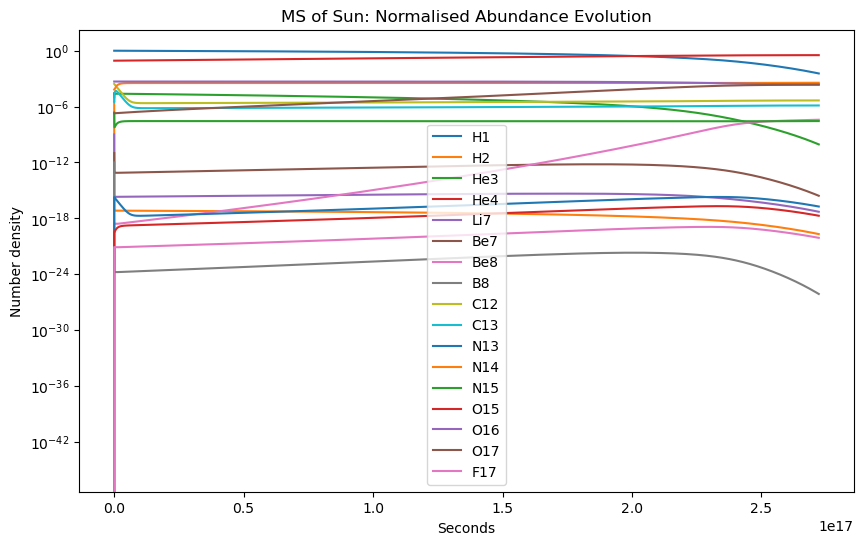

Final Time: 2.721195e+17 Seconds
Final Abundances:
H1: 3.599867e-03
H2: 1.980114e-20
He3: 8.607585e-11
He4: 3.339417e-01
Li7: 4.952427e-18
Be7: 2.589530e-16
Be8: 3.842903e-08
B8: 7.284185e-27
C12: 4.557612e-06
C13: 1.309742e-06
N13: 1.815208e-17
N14: 3.604809e-04
N15: 2.754302e-08
O15: 1.857086e-18
O16: 2.438811e-04
O17: 2.211632e-04
F17: 7.820461e-21
Solver status: -1
Solver message: Required step size is less than spacing between numbers.


In [6]:
initialAbundances = np.zeros(len(elemChart))

H1_val = 1.0e25  # Normalized hydrogen number density

initialAbundances[elemChart['H1']] = H1_val
initialAbundances[elemChart['H2']] = H1_val * 2.0e-5         # Deuterium ~2e-5 of H1.
initialAbundances[elemChart['He3']] = H1_val * 1.0e-5        # Very low abundance.
initialAbundances[elemChart['He4']] = H1_val * 0.085         # Solar He/H ratio ~0.085.
initialAbundances[elemChart['Li7']] = H1_val * 1.0e-9        # Lithium is extremely rare.
initialAbundances[elemChart['Be7']] = H1_val * 1.0e-11       # Very scarce.
initialAbundances[elemChart['Be8']] = 0.0                    # 8Be is unstable.
initialAbundances[elemChart['B8']] = H1_val * 1.0e-12        # Boron is also very low.
initialAbundances[elemChart['C12']] = H1_val * 2.7e-4   # Solar C/H ~2.7e-4.
initialAbundances[elemChart['C13']] = H1_val * 3.0e-6  # C13 is much lower.
initialAbundances[elemChart['N14']] = H1_val * 6.8e-5   # Solar N/H ~6.8e-5.
initialAbundances[elemChart['N15']] = H1_val * 2.3e-7   # N15 is even lower.
initialAbundances[elemChart['O16']] = H1_val * 4.9e-4   # Solar O/H ~4.9e-4.
initialAbundances[elemChart['O17']] = H1_val * 1.9e-7   # O17 is very low.


t_start = 0
t_end   = 3.154e17-3.154e12


#solve the odes using solve_ivp.
#sols = solve_ivp(diffEqs, (t_start, t_end), initialAbundances, args=(elemChart,), method='BDF', rtol=1e-8, atol=1e-20)
sols = solve_ivp(diffEqs, (t_start, t_end), initialAbundances, args=(elemChart,elementMasses,), method='BDF', rtol=1e-8, atol=1e-20)


print(f"the actual number of data points: {len(sols.t)}")

# Present the results.
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

for key in elemChart.keys():
    ax.plot(sols.t, sols.y[elemChart[key]]/1e25, label=key)

#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Seconds')
ax.set_ylabel('Number density')
ax.legend()
ax.set_title('MS of Sun: Normalised Abundance Evolution')
# ax.set_ylim(1e-35, 1)
plt.show()

# Ensure that the ODE solution exists before trying to access it
if 'sols' in globals() and hasattr(sols, 't') and hasattr(sols, 'y'):
    final_time = sols.t[-1]  # Extract the final time step
    final_values = sols.y[:, -1]/1e25  # Extract the final step values,normalised

    print(f"Final Time: {final_time:.6e} Seconds")
    print("Final Abundances:")
    for element, index in elemChart.items():
        print(f"{element}: {final_values[index]:.6e}")
else:
    print("Error: 'sols' is not properly defined. Ensure solve_ivp has been executed successfully.")

print("Solver status:", sols.status)
print("Solver message:", sols.message)

- Plus, it worth working on several key elements that has relatively larger abundance and have contribution to the following periods.

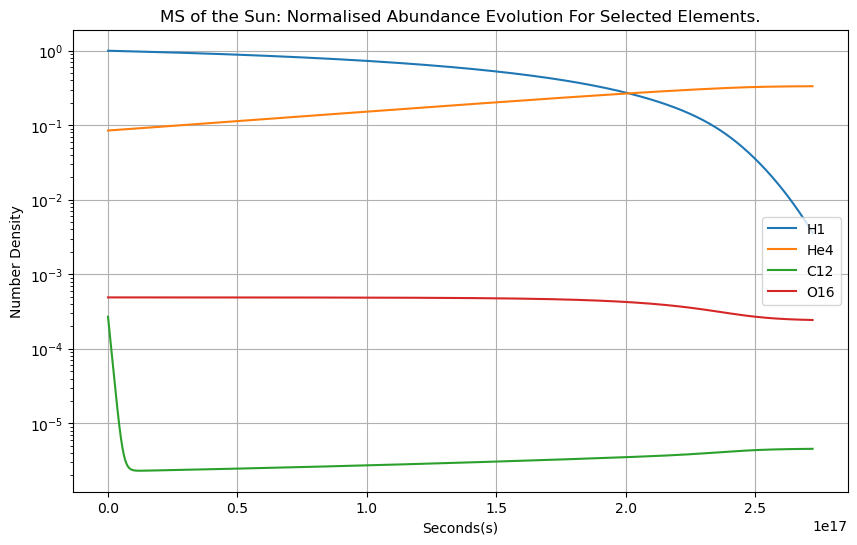

Final Time: 2.721195e+17 Seconds
Final Abundances of Selected Elements:
H1: 3.599867e-03
He4: 3.339417e-01
C12: 4.557612e-06
O16: 2.438811e-04
Final Mass Fractions:
H1: 2.681386e-03
He4: 9.878727e-01
C12: 4.042094e-05
O16: 2.883021e-03


In [7]:
# Ensure that the ODE solution exists before trying to access it
if 'sols' in globals() and hasattr(sols, 't') and hasattr(sols, 'y'):
    # Extract the time steps and the abundance evolution of selected elements
    time_steps = sols.t
    selected_elements = ["H1", "He4", "C12", "O16"]

    # Extract the corresponding abundance evolution data
    abundance_data = {element: sols.y[elemChart[element], :] for element in selected_elements}

    # Plot the abundance evolution for selected elements
    plt.figure(figsize=(10, 6))
    for element in selected_elements:
        plt.plot(time_steps, abundance_data[element]/1e25, label=element)

    plt.xlabel("Seconds(s)")
    plt.ylabel("Number Density")
    #plt.xscale("log")
    plt.yscale("log")  # Use logarithmic scale for better visualization
    plt.title("MS of the Sun: Normalised Abundance Evolution For Selected Elements.")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print the final time and the final abundances of selected elements
    final_time = sols.t[-1]
    final_values = sols.y[:, -1]/1e25

    print(f"Final Time: {final_time:.6e} Seconds")
    print("Final Abundances of Selected Elements:")
    for element in selected_elements:
        print(f"{element}: {final_values[elemChart[element]]:.6e}")

else:
    print("Error: 'sols' is not defined. Make sure solve_ivp has been executed successfully.")


# Calculate total mass
total_mass = sum(final_values[elemChart[element]] * elementMasses[element] for element in elemChart)

# Convert number density to mass fraction
mass_fractions = {element: (final_values[elemChart[element]] * elementMasses[element]) / total_mass for element in elemChart}

# Print the final mass fractions
print("Final Mass Fractions:")
for element in selected_elements:
    print(f"{element}: {mass_fractions[element]:.6e}")

- Calculate and plot the energy generation rate (power) over time.

In [8]:
def energyReleased(t, elements, elemChart, elementMasses):
    temp = T_of_t(t)
    rho_now = rho_of_t(t)

    t9 = temp / 1e9  # convert to 10^9 K
    rho_factor = rho_now / rho_MS_0

    _, eCNO1 = CNO1_cycle(elements, elemChart, elementMasses, t9, rho_factor)
    _, eCNO2 = CNO2_cycle(elements, elemChart, elementMasses, t9, rho_factor)
    # _, e3_alpha = triple_alpha(elements, elemChart, elementMasses, t9, rho_factor)
    e3_alpha = 0
    _, ePP_chain = PP_chain_cycle(elements, elemChart, elementMasses, t9, rho_factor)
    _, eC12O16 = C12toO16(elements, elemChart, elementMasses, t9, rho_factor)

    energy = np.array([ePP_chain, eCNO1, eCNO2, e3_alpha, eC12O16])
    totalEnergy = np.sum(energy)

    return energy, totalEnergy

In [9]:
time_steps = sols.t
abundance_data = sols.y

print(abundance_data.shape)

energies = []
totalEnergies = []

for i in range(len(time_steps)):
    energy, totalEnergy = energyReleased(time_steps[i], abundance_data[:, i], elemChart, elementMasses)
    energies.append(energy)
    totalEnergies.append(totalEnergy)

energies = np.array(energies)
totalEnergies = np.array(totalEnergies)

(17, 7743)


In [10]:
print(time_steps)

[0.00000000e+00 8.68247225e-23 1.73649445e-22 ... 2.72116764e+17
 2.72119153e+17 2.72119507e+17]


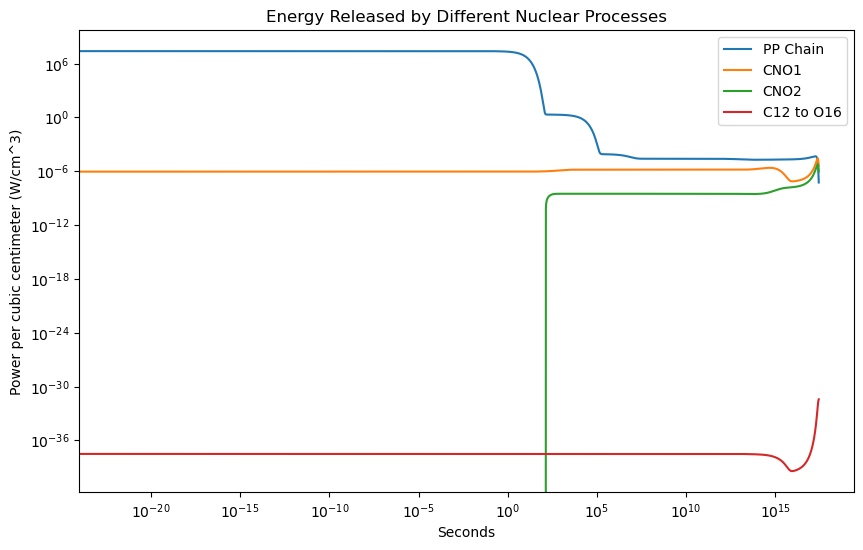

In [11]:
plt.figure(figsize=(10, 6))
# plt.plot(time_steps, totalEnergies, label='Total Energy')
plt.plot(time_steps, energies[:, 0], label='PP Chain')
plt.plot(time_steps, energies[:, 1], label='CNO1')
plt.plot(time_steps, energies[:, 2], label='CNO2')
# plt.plot(time_steps, energies[:, 3], label='Triple Alpha')
plt.plot(time_steps, energies[:, 4], label='C12 to O16')
plt.xlabel('Seconds')
plt.ylabel('Power per cubic centimeter (W/cm^3)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title('Energy Released by Different Nuclear Processes')
plt.show()

Percentage of energy generation from each reaction:

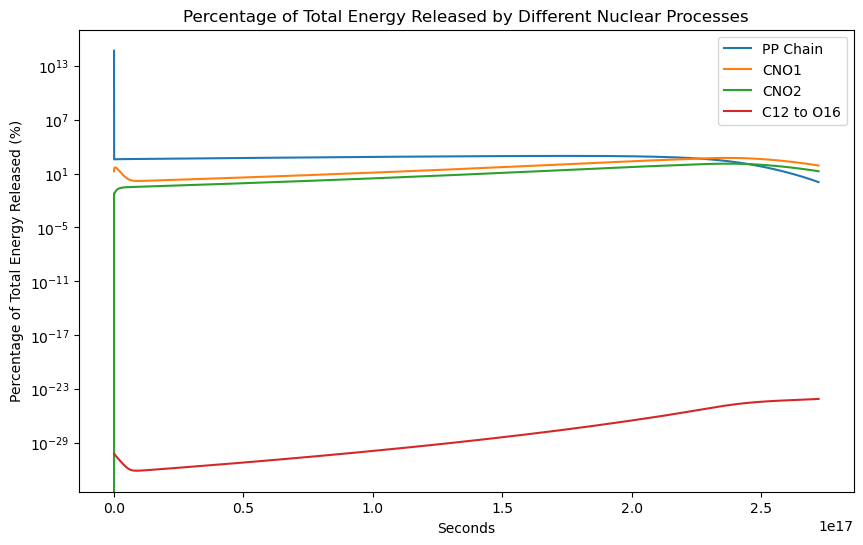

In [12]:
percentages = np.array([energy / totalEnergy for energy in energies]) * 100

plt.figure(figsize=(10, 6))
plt.plot(time_steps, percentages[:, 0], label='PP Chain')
plt.plot(time_steps, percentages[:, 1], label='CNO1')
plt.plot(time_steps, percentages[:, 2], label='CNO2')
# plt.plot(time_steps, percentages[:, 3], label='Triple Alpha')
plt.plot(time_steps, percentages[:, 4], label='C12 to O16')
plt.xlabel('Seconds')
plt.ylabel('Percentage of Total Energy Released (%)')
plt.yscale('log')
plt.legend()
plt.title('Percentage of Total Energy Released by Different Nuclear Processes')
plt.show()

In [13]:
# Print the starting percentage of energy released by each process

startPercentages = percentages[0]

print("Starting Percentages of Total Energy Released:")
print("PP Chain: {:.6e}%".format(startPercentages[0]))
print("CNO1: {:.6e}%".format(startPercentages[1]))
print("CNO2: {:.6e}%".format(startPercentages[2]))
# print("Triple Alpha: {:.6e}%".format(startPercentages[3]))
print("C12 to O16: {:.6e}%".format(startPercentages[3]))

print(np.sum(startPercentages))

Starting Percentages of Total Energy Released:
PP Chain: 5.001789e+14%
CNO1: 1.836387e+01%
CNO2: -2.084070e-01%
C12 to O16: 0.000000e+00%
500178870675744.75


In [14]:
# Print the final percentage of energy released by each process

final_percentages = percentages[-1]

print("Final Percentage of Energy Released by Different Processes:")
print("PP Chain: {:.6e}%".format(final_percentages[0]))
print("CNO1: {:.6e}%".format(final_percentages[1]))
print("CNO2: {:.6e}%".format(final_percentages[2]))
# print("Triple Alpha: {:.6e}%".format(final_percentages[3]))
print("C12 to O16: {:.6e}%".format(final_percentages[4]))

print(np.sum(final_percentages))

Final Percentage of Energy Released by Different Processes:
PP Chain: 1.133406e+00%
CNO1: 8.043961e+01%
CNO2: 1.842699e+01%
C12 to O16: 7.719294e-25%
100.00000000000001


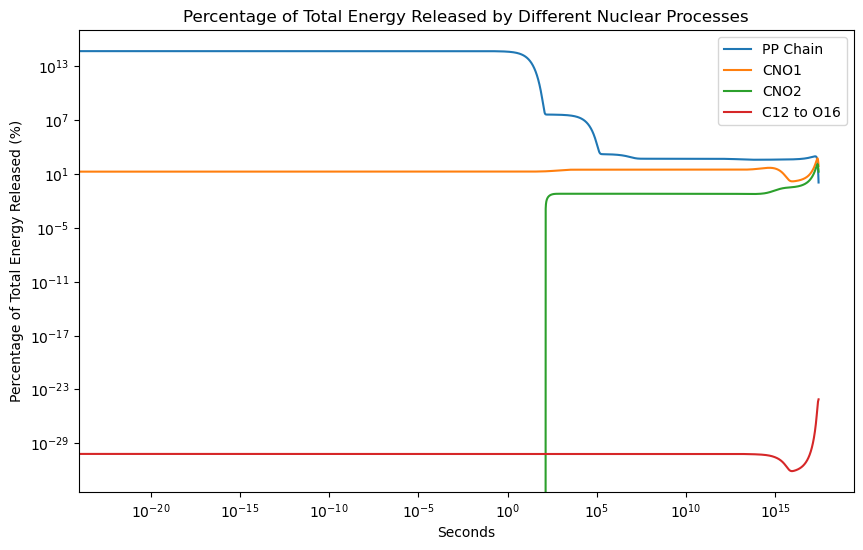

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(time_steps, percentages[:, 0], label='PP Chain')
plt.plot(time_steps, percentages[:, 1], label='CNO1')
plt.plot(time_steps, percentages[:, 2], label='CNO2')
# plt.plot(time_steps, percentages[:, 3], label='Triple Alpha')
plt.plot(time_steps, percentages[:, 4], label='C12 to O16')
plt.xlabel('Seconds')
plt.ylabel('Percentage of Total Energy Released (%)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title('Percentage of Total Energy Released by Different Nuclear Processes')
plt.show()

# Gamow Window


## Data Preperation

In [16]:
def mu(m1, m2):
    """Compute the reduced mass (in amu) of two nuclei with masses m1 and m2."""
    return (m1 * m2) / (m1 + m2)

gamow_params = {
    # PP chain reactions:
    'pp':    {'Z1': 1, 'Z2': 1, 'mu': mu(elementMasses['H1'], elementMasses['H1'])},
    'dp':    {'Z1': 1, 'Z2': 1, 'mu': mu(elementMasses['H1'], elementMasses['H2'])},
    '33':    {'Z1': 2, 'Z2': 2, 'mu': mu(elementMasses['He3'], elementMasses['He3'])},
    '34':    {'Z1': 2, 'Z2': 2, 'mu': mu(elementMasses['He3'], elementMasses['He4'])},
    'li7p':  {'Z1': 3, 'Z2': 1, 'mu': mu(elementMasses['Li7'], elementMasses['H1'])},
    'be7p':  {'Z1': 4, 'Z2': 1, 'mu': mu(elementMasses['Be7'], elementMasses['H1'])},

    # CNO1 cycle reactions:
    'C12(p,g)N13': {'Z1': 6, 'Z2': 1, 'mu': mu(elementMasses['C12'], elementMasses['H1'])},
    'C13(p,g)N14': {'Z1': 6, 'Z2': 1, 'mu': mu(elementMasses['C13'], elementMasses['H1'])},
    'N14(p,g)O15': {'Z1': 7, 'Z2': 1, 'mu': mu(elementMasses['N14'], elementMasses['H1'])},
    'N15(p,a)C12': {'Z1': 7, 'Z2': 1, 'mu': mu(elementMasses['N15'], elementMasses['H1'])},

    # CNO2 cycle reactions:
    'N15(p,g)O16': {'Z1': 7, 'Z2': 1, 'mu': mu(elementMasses['N15'], elementMasses['H1'])},
    'O16(p,g)F17': {'Z1': 8, 'Z2': 1, 'mu': mu(elementMasses['O16'], elementMasses['H1'])},
    'O17(p,a)N14': {'Z1': 8, 'Z2': 1, 'mu': mu(elementMasses['O17'], elementMasses['H1'])},

    # Triple-alpha process:
    # Step 1: He4 + He4 -> 8Be
    '3a1': {'Z1': 2, 'Z2': 2, 'mu': mu(elementMasses['He4'], elementMasses['He4'])},
    # Step 2: 8Be + He4 -> 12C
    '3a2': {'Z1': 4, 'Z2': 2, 'mu': mu(elementMasses['Be8'], elementMasses['He4'])}
}

# Print the parameters for verification:
for key, params in gamow_params.items():
    print(f"{key}: Z1={params['Z1']}, Z2={params['Z2']}, mu={params['mu']:.4f} u")

#times_to_plot = [t[0], t[len(t)//2], t[-1]]

pp: Z1=1, Z2=1, mu=0.5039 u
dp: Z1=1, Z2=1, mu=0.6717 u
33: Z1=2, Z2=2, mu=1.5080 u
34: Z1=2, Z2=2, mu=1.7200 u
li7p: Z1=3, Z2=1, mu=0.8812 u
be7p: Z1=4, Z2=1, mu=0.8813 u
C12(p,g)N13: Z1=6, Z2=1, mu=0.9297 u
C13(p,g)N14: Z1=6, Z2=1, mu=0.9353 u
N14(p,g)O15: Z1=7, Z2=1, mu=0.9402 u
N15(p,a)C12: Z1=7, Z2=1, mu=0.9444 u
N15(p,g)O16: Z1=7, Z2=1, mu=0.9444 u
O16(p,g)F17: Z1=8, Z2=1, mu=0.9481 u
O17(p,a)N14: Z1=8, Z2=1, mu=0.9514 u
3a1: Z1=2, Z2=2, mu=2.0013 u
3a2: Z1=4, Z2=2, mu=2.6684 u


In [17]:
len_mid = int(len(t_MS)/2) # get index for middle of the time sequence
times_to_plot = [0.0, t_MS[len_mid]/2, t_MS[-1]]

def compute_gamow_window(Z1, Z2, mu_val, t):
    """Returns (E0, DeltaE) in keV for given charges, reduced mass mu_val, and T (K)."""
    T = T_of_t(t)
    T9 = T / 1e9
    E0 = 12.2 * ((Z1**2 * Z2**2 * mu_val)**(1/3)) * (T9**(2/3))
    kT = 8.617e-5 * T  # keV
    DeltaE = 4 * np.sqrt(E0 * kT / 3)
    return E0, DeltaE

E_vals_pp = np.linspace(-10,10, 300)   # narrower range for PP
E_vals_cno = np.linspace(-1,8, 300)  # slightly larger range for CNO
E_vals_3a = np.linspace(-1,8, 400)  # even larger range for triple-a


def plot_gamow(ax, reaction_label, E_array, times, color_list):
    """
    Plot the Gamow window for a single reaction at multiple times,
    using the provided E_array for the x-axis.
    """
    params = gamow_params[reaction_label]
    Z1, Z2, mu_val = params['Z1'], params['Z2'], params['mu']

    for i, t_val in enumerate(times):
        E0, DeltaE = compute_gamow_window(Z1, Z2, mu_val, t_val)
        sigma = DeltaE / 2.0
        # Gaussian approximation
        gw = np.exp(-((E_array - E0)**2) / (sigma**2))
        ax.plot(E_array, gw, label=f"{reaction_label}, t={t_val:.1e}\nE0={E0:.2f}, ΔE={DeltaE:.2f}",
                color=color_list[i % len(color_list)])

    ax.set_xlabel("Energy (keV)")
    ax.set_ylabel("Relative Probability")
    ax.grid(True)
    ax.legend(fontsize=8)


# Colors for times
colors = ["red", "blue", "green"]  # one color per time

## PP chain

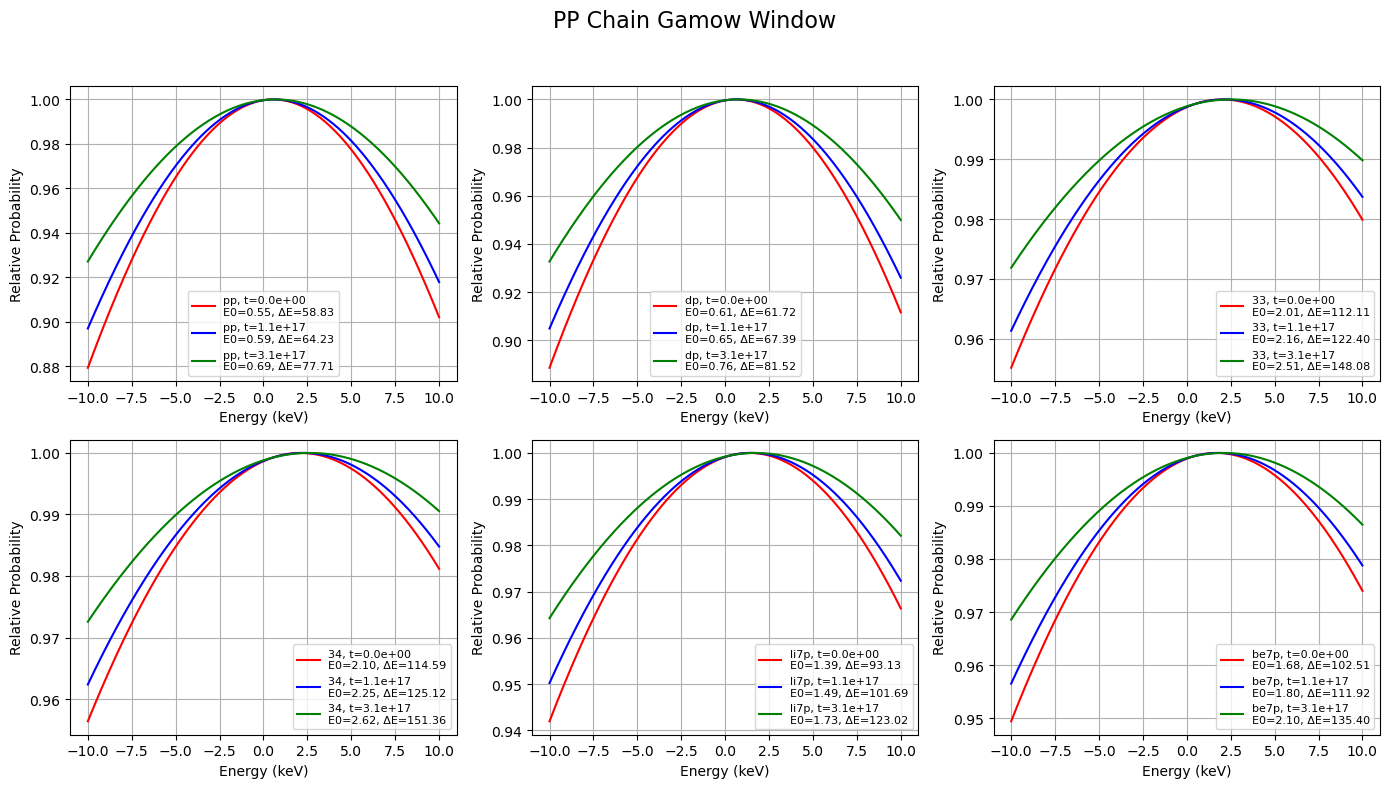

In [18]:
pp_keys = ['pp', 'dp', '33', '34', 'li7p', 'be7p']
fig_pp, axs_pp = plt.subplots(2, 3, figsize=(14, 8))
axs_pp = axs_pp.flatten()
for i, key in enumerate(pp_keys):
    plot_gamow(axs_pp[i], key, E_vals_pp, times_to_plot, colors)

fig_pp.suptitle("PP Chain Gamow Window", fontsize=16)
fig_pp.tight_layout(rect=[0, 0, 1, 0.95])

## CNO1 Cycle

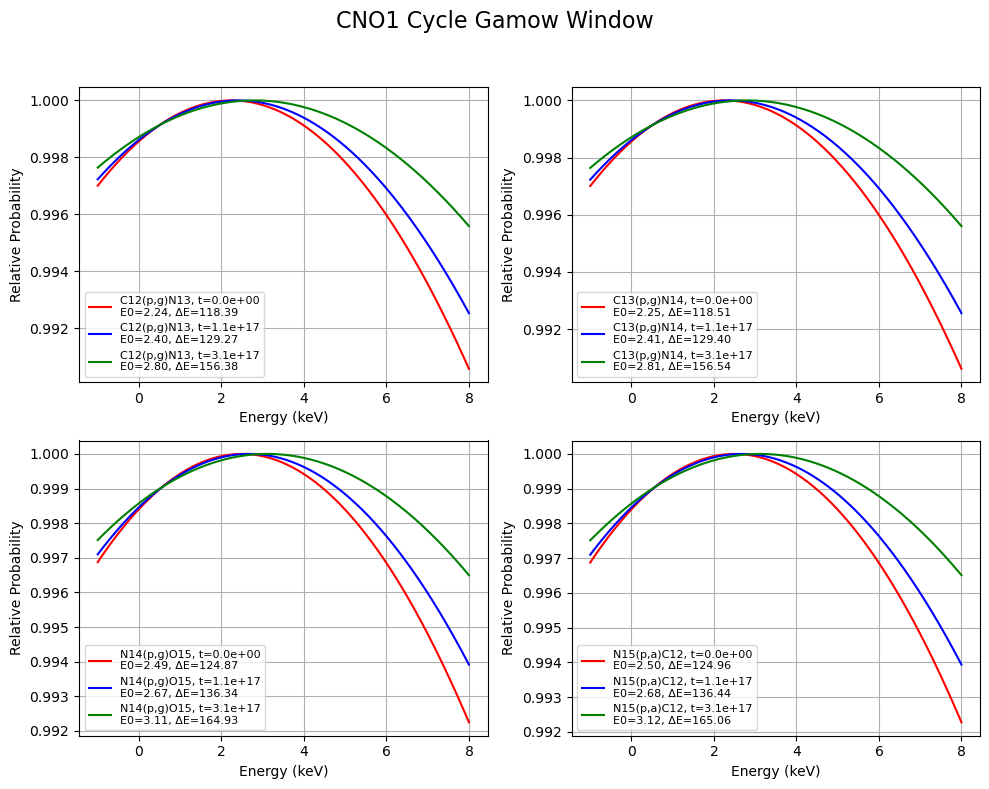

In [19]:
cno1_keys = ['C12(p,g)N13', 'C13(p,g)N14', 'N14(p,g)O15', 'N15(p,a)C12']
fig_cno1, axes_cno1 = plt.subplots(2, 2, figsize=(10, 8))
axes_cno1 = axes_cno1.flatten()

for i, key in enumerate(cno1_keys):
    plot_gamow(axes_cno1[i], key, E_vals_cno, times_to_plot, colors)


fig_cno1.suptitle("CNO1 Cycle Gamow Window", fontsize=16)
fig_cno1.tight_layout(rect=[0, 0, 1, 0.95])

## CNO2 Cycle

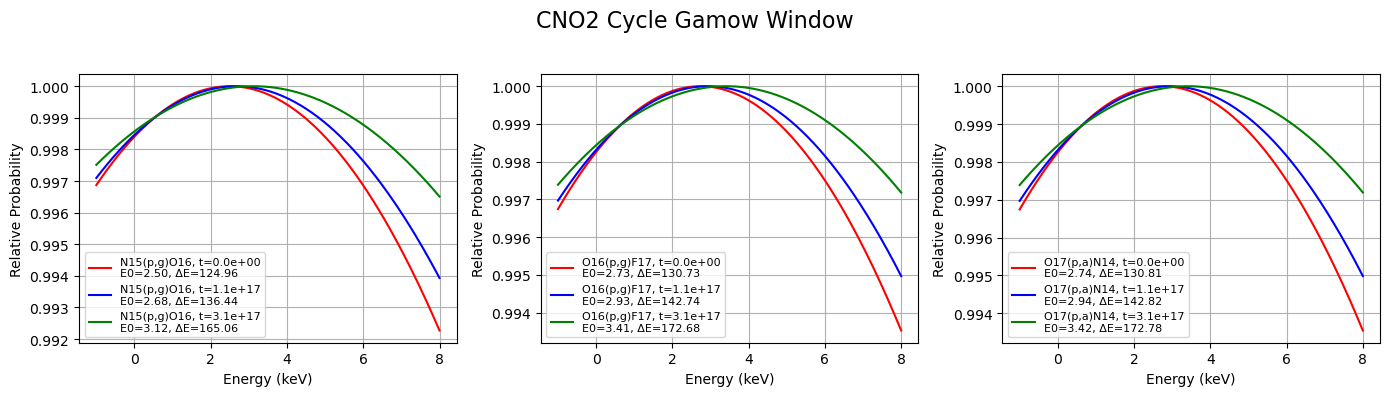

In [20]:
cno2_keys = ['N15(p,g)O16', 'O16(p,g)F17', 'O17(p,a)N14']
fig_cno2, axes_cno2 = plt.subplots(1, 3, figsize=(14, 4))
axes_cno2 = axes_cno2.flatten()

for i, key in enumerate(cno2_keys):
    plot_gamow(axes_cno2[i], key, E_vals_cno, times_to_plot, colors)

fig_cno2.suptitle("CNO2 Cycle Gamow Window", fontsize=16)
fig_cno2.tight_layout(rect=[0, 0, 1, 0.95])

## Triple Alpha

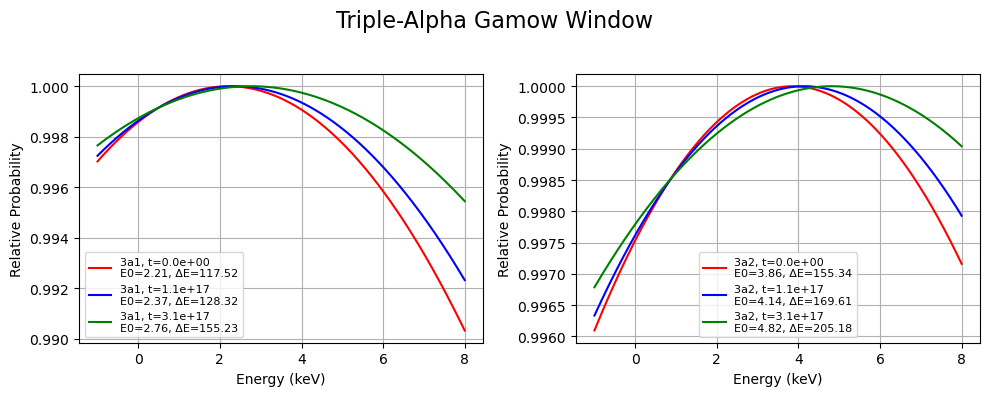

In [21]:
threea_keys = ['3a1', '3a2']
fig_3a, axes_3a = plt.subplots(1, 2, figsize=(10, 4))
axes_3a = axes_3a.flatten()

for i, key in enumerate(threea_keys):
    plot_gamow(axes_3a[i], key, E_vals_3a, times_to_plot, colors)

fig_3a.suptitle("Triple-Alpha Gamow Window", fontsize=16)
fig_3a.tight_layout(rect=[0, 0, 1, 0.95])

## Final Ouput

In [22]:
# Assume t_MS, T_of_t_linear, and compute_gamow_window have been defined.

final_time = t_MS[-1]  # Use the final time, for example t_MS
T_final = T_of_t(final_time)

print("Final Gamow Window values at t = {:.2e} s (T = {:.2e} K):".format(final_time, T_final))
for reaction, params in gamow_params.items():
    E0, DeltaE = compute_gamow_window(params['Z1'], params['Z2'], params['mu'], T_final)
    print(f"{reaction}: E0 = {E0:.2f} keV, ΔE = {DeltaE:.2f} keV")

Final Gamow Window values at t = 3.07e+17 s (T = 1.90e+07 K):
pp: E0 = 0.55 keV, ΔE = 58.83 keV
dp: E0 = 0.61 keV, ΔE = 61.72 keV
33: E0 = 2.01 keV, ΔE = 112.11 keV
34: E0 = 2.10 keV, ΔE = 114.59 keV
li7p: E0 = 1.39 keV, ΔE = 93.13 keV
be7p: E0 = 1.68 keV, ΔE = 102.51 keV
C12(p,g)N13: E0 = 2.24 keV, ΔE = 118.39 keV
C13(p,g)N14: E0 = 2.25 keV, ΔE = 118.51 keV
N14(p,g)O15: E0 = 2.49 keV, ΔE = 124.87 keV
N15(p,a)C12: E0 = 2.50 keV, ΔE = 124.96 keV
N15(p,g)O16: E0 = 2.50 keV, ΔE = 124.96 keV
O16(p,g)F17: E0 = 2.73 keV, ΔE = 130.73 keV
O17(p,a)N14: E0 = 2.74 keV, ΔE = 130.81 keV
3a1: E0 = 2.21 keV, ΔE = 117.52 keV
3a2: E0 = 3.86 keV, ΔE = 155.34 keV


# Machine Learning Try

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

# get data from ODE
time_data = sols.t                # shape (n_points,)
Y_raw = sols.y.T/1e25                  # transpose:shape (n_points, n_species)
species_list = list(elemChart.keys())  # ['H1','H2','He3',..., 'O17']

eps = 1e-30  # prevent log(0)
X = np.log10(time_data).reshape(-1, 1)  # (n_points, 1)

# do log10(abundunce + eps) for all elements
Y_log = np.log10(Y_raw + eps)  # (n_points, n_species)

print("X shape:", X.shape, "Y_log shape:", Y_log.shape)


X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y_log, test_size=0.2, random_state=42, shuffle=True
)

print("Train set:", X_train.shape, Y_train.shape)
print("Test  set:", X_test.shape, Y_test.shape)

# build and train NN
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(Y_train.shape[1])  # output dim = n_species
])


optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

model.compile(optimizer=optimizer, loss='mse')
model.summary()

history = model.fit(
    X_train, Y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    verbose=2
)


plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("Training Loss with log-transformed data")
plt.show()

2025-03-12 02:52:06.397505: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


X shape: (7743, 1) Y_log shape: (7743, 17)
Train set: (6194, 1) (6194, 17)
Test  set: (1549, 1) (1549, 17)


/var/folders/st/xpd60jqx24d19fy407rgqcjr0000gn/T/ipykernel_25740/1400829951.py:11: RuntimeWarning: divide by zero encountered in log10
  X = np.log10(time_data).reshape(-1, 1)  # (n_points, 1)
/Users/hezilie/.local/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 17)             │         1,105 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,617 (37.57 KB)

 Trainable params: 9,617 (37.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
155/155 - 1s - 9ms/step - loss: 139.0651 - val_loss: 114.2998
Epoch 2/200
155/155 - 0s - 3ms/step - loss: 86.4676 - val_loss: 57.2373
Epoch 3/200
155/155 - 0s - 3ms/step - loss: 39.7885 - val_loss: 25.7550
Epoch 4/200
155/155 - 0s - 2ms/step - loss: 23.8139 - val_loss: 21.2475
Epoch 5/200
155/155 - 0s - 2ms/step - loss: 22.0307 - val_loss: 20.5793
Epoch 6/200
155/155 - 0s - 2ms/step - loss: 21.2690 - val_loss: 20.0360
Epoch 7/200
155/155 - 0s - 2ms/step - loss: 20.5248 - val_loss: 19.3989
Epoch 8/200
155/155 - 0s - 2ms/step - loss: 19.7367 - val_loss: 18.7447
Epoch 9/200
155/155 - 0s - 2ms/step - loss: 18.8627 - val_loss: 17.9141
Epoch 10/200
155/155 - 0s - 3ms/step - loss: 17.7995 - val_loss: 16.8133
Epoch 11/200
155/155 - 0s - 2ms/step - loss: 16.5415 - val_loss: 15.6446
Epoch 12/200
155/155 - 0s - 2ms/step - loss: 15.1715 - val_loss: 14.2324
Epoch 13/200
155/155 - 0s - 2ms/step - loss: 13.6248 - val_loss: 12.7312
Epoch 14/200
155/155 - 0s - 2ms/step - loss: 11.9332 - val

In [ ]:
Y_test_pred = model.predict(X_test)

# do 10** to inversely going back to initial abundance
Y_test_pred_raw = 10**(Y_test_pred)
Y_test_raw = 10**(Y_test)

fig, axes = plt.subplots(len(species_list), 1, figsize=(8, 3*len(species_list)), sharex=True)
for i, sp in enumerate(species_list):
    axes[i].scatter(X_test[:, 0], Y_test_raw[:, i], s=10, label='True')
    axes[i].scatter(X_test[:, 0], Y_test_pred_raw[:, i], s=10, label='Pred')
    axes[i].set_ylabel(sp)
    axes[i].legend()

axes[-1].set_xlabel("log10(time)")
plt.suptitle("All Species after log transform (Test Set)")
plt.tight_layout()
plt.show()